In [1]:
from vampires_calibration.csv_tools import read_csv,match_fits_tags
from vampires_calibration.on_sky import write_fits_info_to_csv_psf,fit_CHARIS_Mueller_matrix_by_bin_m3
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from vampires_calibration.utils import process_errors,generate_system_mueller_matrix,process_dataset,process_model
from vampires_calibration.fitting import model
from vampires_calibration.plotting import plot_data_and_model
from vampires_calibration.constants import wavelength_bins
from pyMuellerMat.physical_models.charis_physical_models import HWP_retardance, IMR_retardance,M3_diattenuation,M3_retardance
import pandas as pd
from pathlib import Path

/opt/anaconda3/envs/charisenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# try one star
# for bin in range(22):
#     df = pd.read_csv(f'datacsvs/onsky_csvs/unpol_standards_2_stars/bin{bin}.csv')
#     # remove all stars with tag 343631 in filepath
#     df = df[~df['filepath'].str.contains('343631')]
#     df.to_csv(f'datacsvs/onsky_csvs/unpol_standards_1_star/bin{bin}.csv',index=False)

In [6]:
# Plotting data with original model

filepath = Path('datacsvs/onsky_csvs/HD25532/bin2.csv')

# Read in data

interleaved_values, interleaved_stds, configuration_list = read_csv(filepath,mode='m3')
print("Interleaved Values")
print("Length: ", len(interleaved_values))
print(interleaved_values[0 : 10])
print("Interleaved Stds")
print("Length: ", len(interleaved_stds))
print(interleaved_stds[0 : 10])
print("Configuration List")
print("Length: ", len(configuration_list))
print(configuration_list[0 : 10])
print(interleaved_stds[0])

Interleaved Values
Length:  56
[ -90247.59059385 3253839.90543102 -184152.14516618 3100358.1908987
 -109843.99728428 3141096.16931325 -111585.69428613 2964548.87982759
  -75010.5704448  2809764.67642297]
Interleaved Stds
Length:  56
[2302.18387403 2302.18387403 2368.55987342 2368.55987342 1576.97465783
 1576.97465783 1373.79636338 1373.79636338 1292.45092356 1292.45092356]
Configuration List
Length:  28
[{'hwp': {'theta': 22.5}, 'image_rotator': {'theta': 85.50399}, 'altitude_rot': {'pa': 41.99246511}, 'parang_rot': {'pa': 83.87981766548525}}, {'hwp': {'theta': 67.5}, 'image_rotator': {'theta': 85.43126}, 'altitude_rot': {'pa': 41.85761247}, 'parang_rot': {'pa': 83.83396670474883}}, {'hwp': {'theta': 0.0}, 'image_rotator': {'theta': 85.34017}, 'altitude_rot': {'pa': 41.6499689}, 'parang_rot': {'pa': 83.76331306430977}}, {'hwp': {'theta': 45.0}, 'image_rotator': {'theta': 85.31183}, 'altitude_rot': {'pa': 41.59359128}, 'parang_rot': {'pa': 83.74407858219183}}, {'hwp': {'theta': 22.5}, '

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.9121e+03                                    5.46e+05    
       1              2         2.5194e+03      1.39e+03       2.68e-02       3.09e+03    
       2              3         2.5145e+03      4.94e+00       6.54e-02       1.10e+03    
       3              4         2.5051e+03      9.39e+00       1.31e-01       1.03e+03    
       4              5         2.4879e+03      1.72e+01       2.60e-01       1.25e+03    
       5              6         2.4596e+03      2.83e+01       5.15e-01       2.02e+03    
       6              7         2.4267e+03      3.29e+01       1.01e+00       2.20e+03    
       7              8         2.4215e+03      5.20e+00       5.66e-01       3.15e+02    
       8              9         2.4215e+03      9.53e-03       2.47e-02       5.44e-01    
       9             10         2.4215e+03      5.53e-09       2.43e-05       1.37e-03    

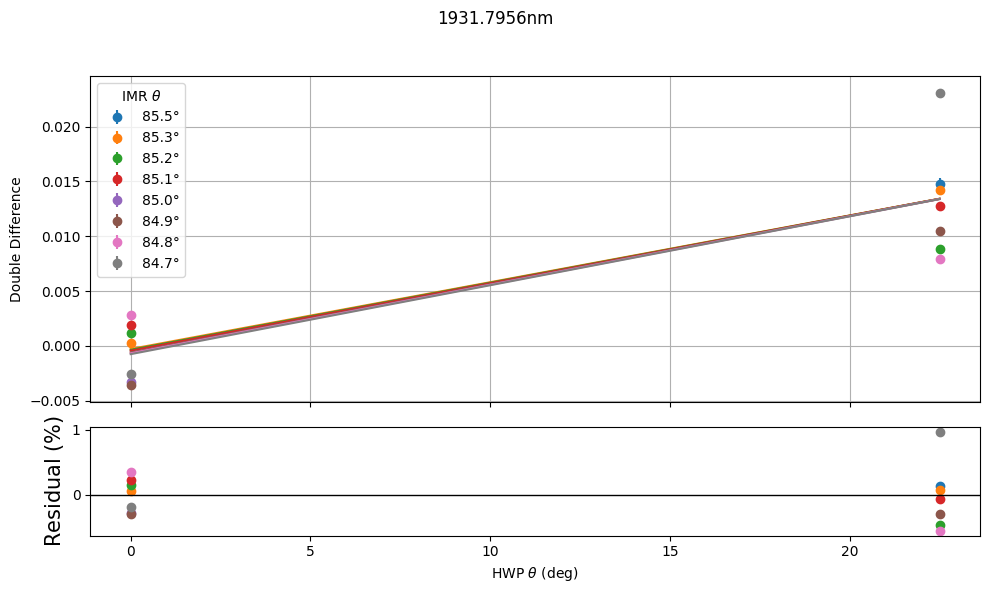

Updated Mueller Matrix:
[[ 0.50043857 -0.19512609 -0.45633917 -0.02377574]
 [-0.49687449  0.19643626  0.45964929  0.02394658]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
56 28
Residuals range: -0.551504105599088 0.9682196722900427
Error: [1.30795587e-03 2.50483220e+00]
s_res: 0.4230755540042846


/var/folders/2v/qmxm7kj51fg6kf7g36xrbysr0000gn/T/ipykernel_1418/2050289960.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


In [4]:
# fit diattenuation
# test minimization

# Test fitting with the wavelength bin we plotted earlier

error,fig2, ax2,sres = fit_CHARIS_Mueller_matrix_by_bin_m3(filepath, 15, 
    Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/unpol_imr_diat_fit/test.json'),
    )
ax2.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',  
)
ax2.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)
ax2.minorticks_on()
fig2.suptitle('')
fig2.show()
#fig2.savefig('/Users/thomasmcintosh/Desktop/CHARIS-REU/overleaf_plots/naive_model_single_diff_vs_hwp_1329.png',bbox_inches='tight', dpi=600)



   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.9077e+02                                    1.00e+01    
       1              2         1.3403e+02      1.57e+02       1.00e+00       1.66e+01    
       2              3         1.3403e+02      4.36e-04       1.64e-02       7.00e+00    
       3              4         1.3403e+02      7.77e-05       6.94e-03       2.97e+00    
       4              5         1.3403e+02      1.39e-05       2.94e-03       1.29e+00    
       5              6         1.3403e+02      2.44e-06       1.28e-03       5.37e-01    
       6              7         1.3403e+02      5.56e-07       5.32e-04       1.83e-01    
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 2.9077e+02, final cost 1.3403e+02, first-order optimality 1.83e-01.
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.552e+00 -8.298

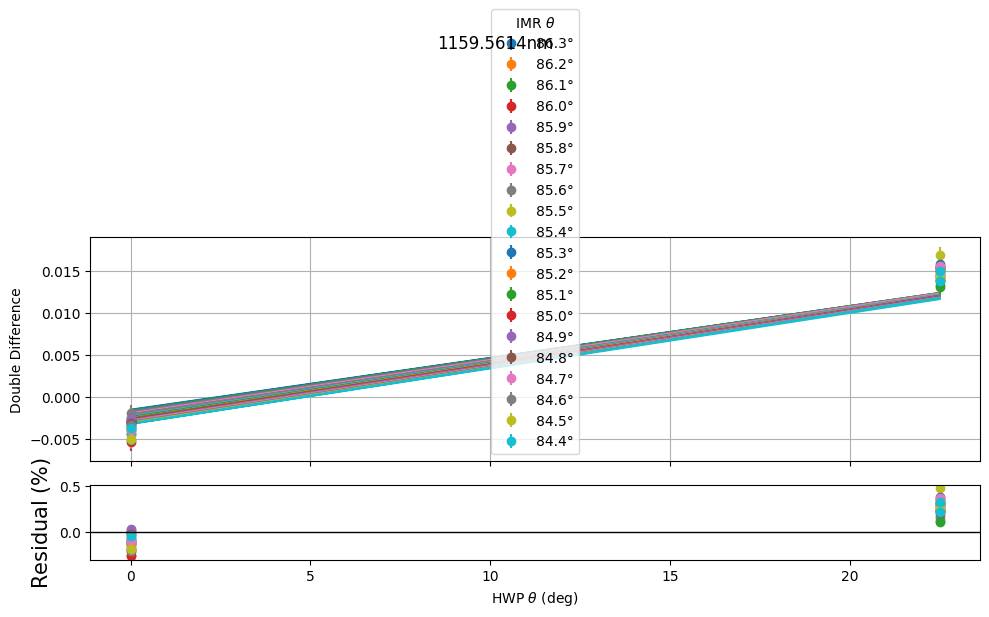

Updated Mueller Matrix:
[[ 0.02541021 -0.0249636   0.00441479  0.0017342 ]
 [-0.02541021  0.0249636  -0.00441479 -0.0017342 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.27306450237055185 0.4759536339695487
Error: [3.37241257e-05 2.25129317e+00]
s_res: 0.23475941858271418
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.9887e+02                                    1.37e+01    
       1              2         1.2352e+02      1.75e+02       1.00e+00       2.46e+01    
       2              3         1.2351e+02      1.06e-03       2.50e-02       9.39e+00    
       3              4         1.2351e+02      1.54e-04       9.53e-03       3.59e+00    
       4              5         1.2351e+02      2.22e-05       3.65e-03       1.37e+00    
       5              6         1.2351e+02      3.43e-06       1.40e-03       5.27e-01    
   

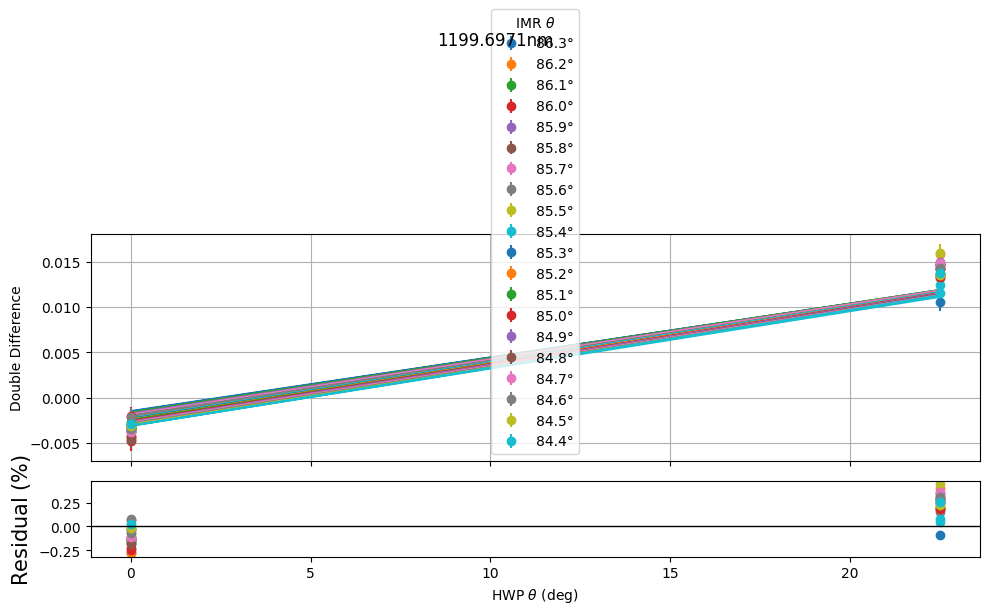

Updated Mueller Matrix:
[[ 0.03139655 -0.03083185  0.00542249  0.00239519]
 [-0.02372481  0.02329809 -0.00409751 -0.00180992]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.28066266757724645 0.4402099687911818
Error: [2.83063869e-05 2.08929226e+00]
s_res: 0.22068324842099646
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7280e+02                                    1.17e+01    
       1              2         1.2767e+02      1.45e+02       1.00e+00       1.33e+03    
       2              3         1.2435e+02      3.33e+00       1.45e+00       5.09e+02    
       3              4         1.2387e+02      4.73e-01       5.52e-01       1.95e+02    
       4              5         1.2380e+02      7.14e-02       2.15e-01       7.72e+01    
       5              6         1.2379e+02      1.09e-02       8.40e-02       2.99e+01    
   

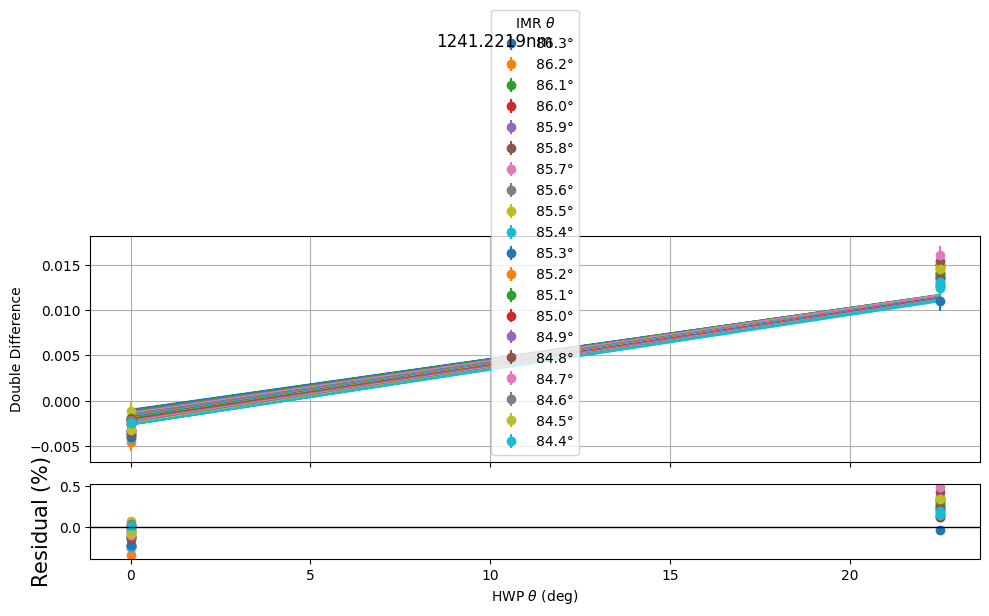

Updated Mueller Matrix:
[[ 0.02712583 -0.02642957  0.00566631  0.00227623]
 [-0.02378148  0.02317106 -0.00496771 -0.0019956 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.33962409328880816 0.48787530476132623
Error: [3.05723593e-05 2.14844594e+00]
s_res: 0.22710299320849645
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.8662e+02                                    1.48e+01    
       1              2         1.2907e+02      1.58e+02       1.00e+00       1.24e+03    
       2              3         1.2591e+02      3.16e+00       1.45e+00       4.64e+02    
       3              4         1.2548e+02      4.30e-01       5.43e-01       1.74e+02    
       4              5         1.2542e+02      6.20e-02       2.07e-01       6.72e+01    
       5              6         1.2541e+02      9.05e-03       7.90e-02       2.55e+01    
  

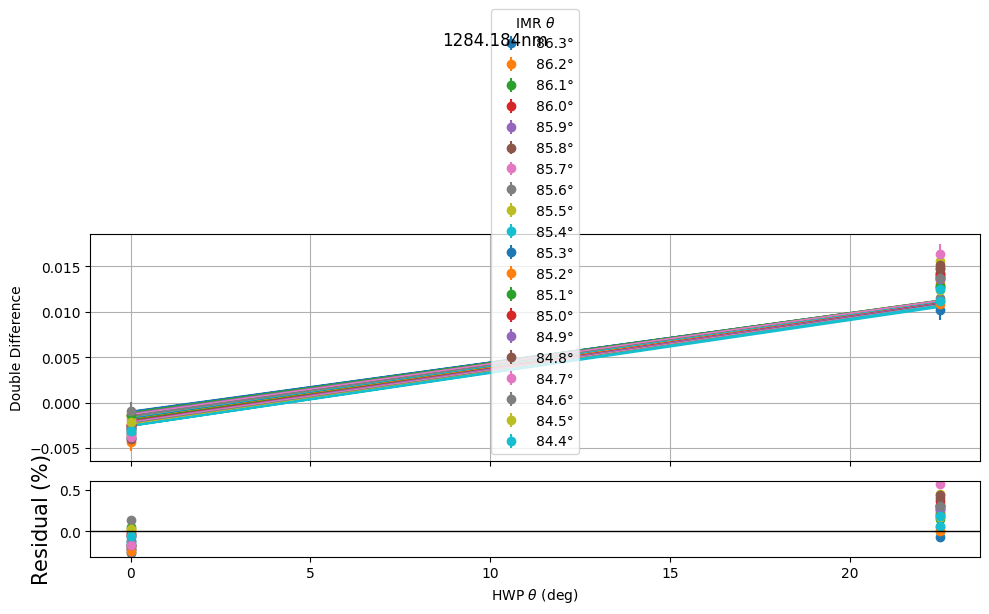

Updated Mueller Matrix:
[[ 0.03323423 -0.03235662  0.00696121  0.00301735]
 [-0.02092049  0.02036805 -0.00438198 -0.00189938]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.2656255280164377 0.5669948405055398
Error: [2.90844398e-05 2.22736192e+00]
s_res: 0.23119935578710613
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.0850e+02                                    1.70e+01    
       1              2         1.3634e+02      1.72e+02       1.00e+00       1.08e+03    
       2              3         1.3382e+02      2.52e+00       1.33e+00       3.99e+02    
       3              4         1.3348e+02      3.38e-01       4.92e-01       1.48e+02    
       4              5         1.3344e+02      4.77e-02       1.85e-01       5.67e+01    
       5              6         1.3343e+02      6.82e-03       7.01e-02       2.12e+01    
    

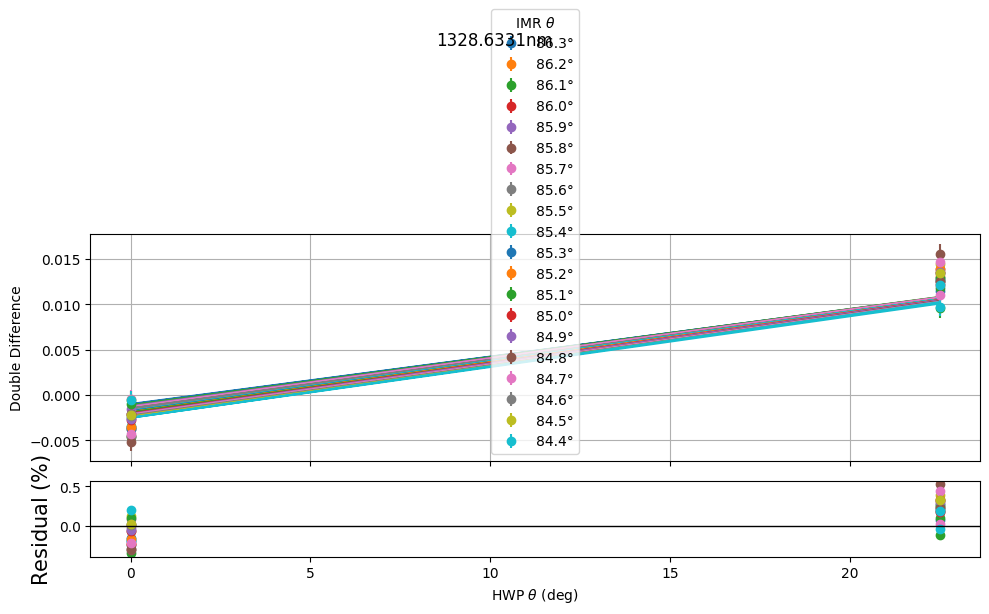

Updated Mueller Matrix:
[[ 0.03913078 -0.03809728  0.0080877   0.00379539]
 [-0.01927376  0.01876471 -0.00398357 -0.00186941]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.35206641596978056 0.5245983890165224
Error: [2.88259768e-05 2.39693328e+00]
s_res: 0.2373536140972755
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.3485e+02                                    2.24e+01    
       1              2         1.5268e+02      1.82e+02       1.00e+00       2.36e+02    
       2              3         1.5252e+02      1.57e-01       3.17e-01       5.79e+01    
       3              4         1.5251e+02      9.41e-03       7.78e-02       1.42e+01    
       4              5         1.5251e+02      5.73e-04       1.92e-02       3.52e+00    
       5              6         1.5251e+02      3.52e-05       4.74e-03       8.60e-01    
    

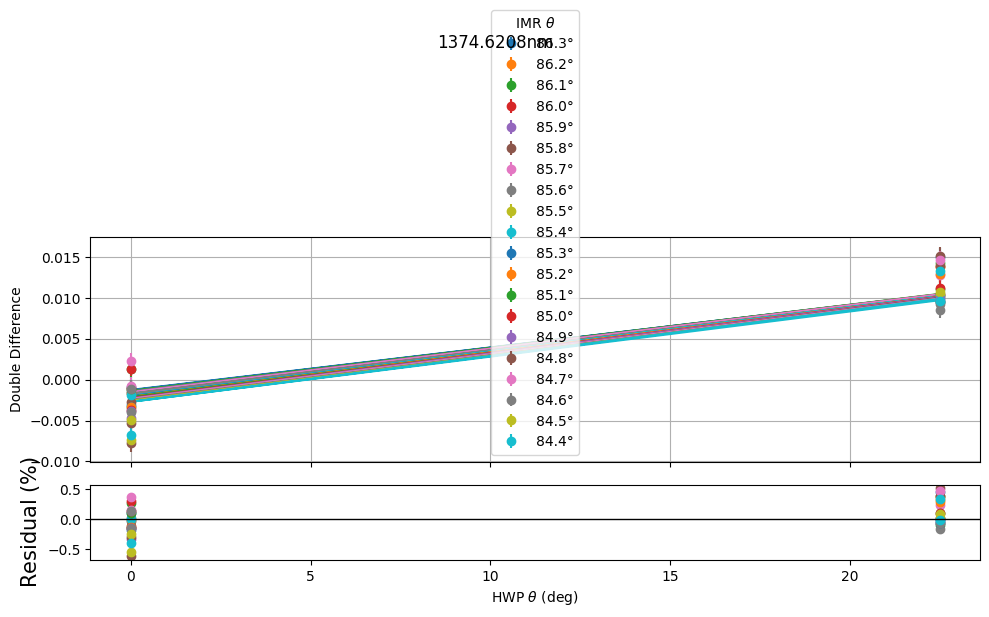

Updated Mueller Matrix:
[[ 0.0388595  -0.03799598  0.00709698  0.00399989]
 [-0.02791006  0.02728985 -0.00509726 -0.00287284]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.6136143252789273 0.5181120778695361
Error: [3.07836744e-05 2.79025165e+00]
s_res: 0.2608956196601719
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2872e+02                                    1.24e+01    
       1              2         1.1299e+02      1.16e+02       1.00e+00       1.18e+05    
       2              3         1.1099e+02      2.00e+00       4.50e-01       5.82e+02    
       3              4         1.1010e+02      8.87e-01       7.86e-01       1.66e+02    
       4              5         1.0997e+02      1.30e-01       2.33e-01       6.51e+01    
       5              6         1.0992e+02      5.44e-02       9.57e-02       1.81e+01    
     

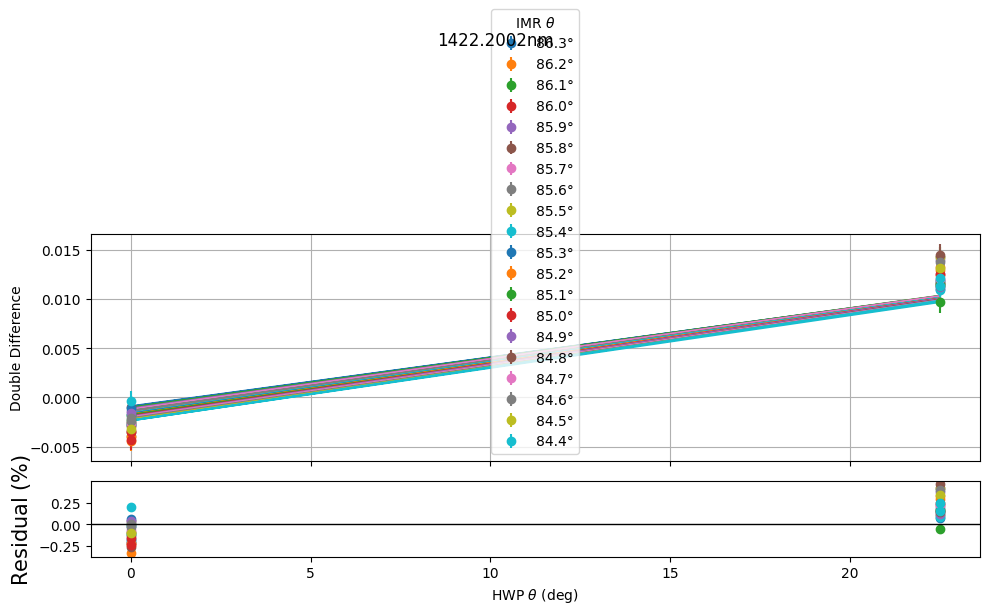

Updated Mueller Matrix:
[[ 0.03118473 -0.03030343  0.00657635  0.00330777]
 [-0.02142876  0.02082317 -0.00451898 -0.00227295]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.3321455361986585 0.45904168126377454
Error: [3.83490371e-05 2.94870200e+00]
s_res: 0.2194944547462759
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.4485e+02                                    1.74e+01    
       1              2         7.9242e+01      1.66e+02       1.00e+00       1.25e+03    
       2              3         7.4356e+01      4.89e+00       1.99e+00       3.66e+02    
       3              4         7.3948e+01      4.08e-01       5.81e-01       1.08e+02    
       4              5         7.3911e+01      3.70e-02       1.76e-01       3.36e+01    
       5              6         7.3907e+01      3.44e-03       5.35e-02       1.01e+01    
    

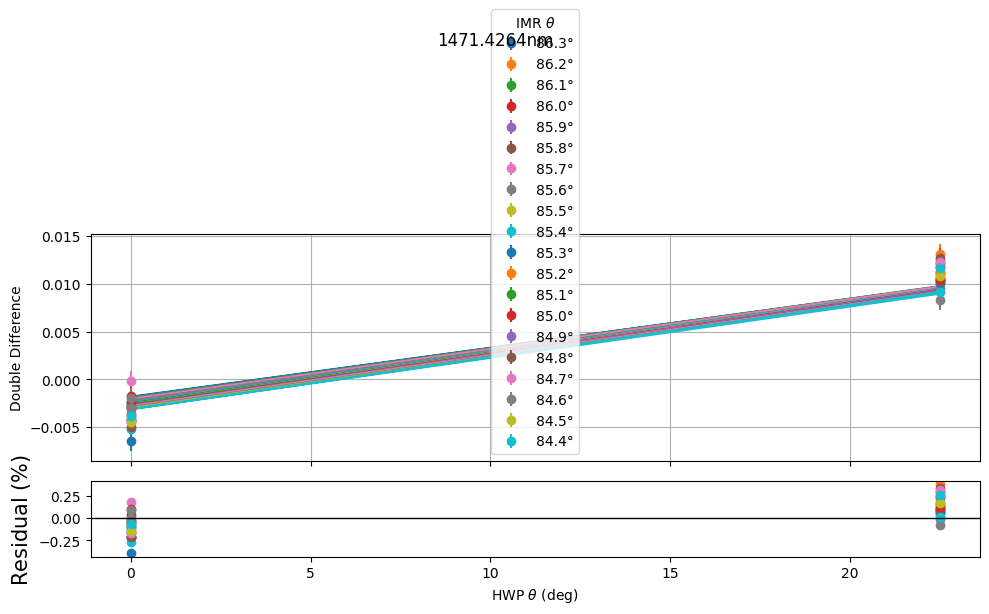

Updated Mueller Matrix:
[[ 0.04132086 -0.04074984  0.00503675  0.00463631]
 [-0.03344504  0.03298285 -0.00407673 -0.00375262]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.395985896230469 0.37896847110800935
Error: [2.41465626e-05 2.33122502e+00]
s_res: 0.18308398659037878
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.3253e+02                                    1.54e+01    
       1              2         8.3849e+01      1.49e+02       1.00e+00       2.00e+03    
       2              3         6.9108e+01      1.47e+01       3.56e+00       5.25e+02    
       3              4         6.8153e+01      9.56e-01       9.30e-01       1.42e+02    
       4              5         6.8077e+01      7.52e-02       2.62e-01       4.20e+01    
       5              6         6.8071e+01      6.13e-03       7.49e-02       1.17e+01    
    

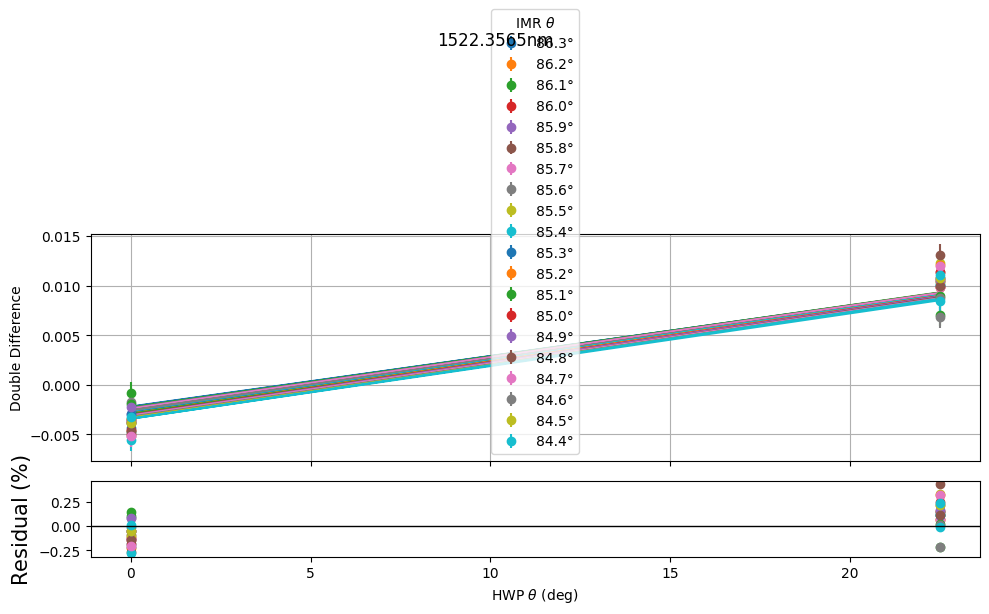

Updated Mueller Matrix:
[[ 0.0439217  -0.04349612  0.00340817  0.00505845]
 [-0.03543814  0.03509476 -0.00274988 -0.0040814 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.2816002887710557 0.43014876692390847
Error: [2.36517463e-05 2.39821772e+00]
s_res: 0.18042080331705668
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.3581e+02                                    1.18e+01    
       1              2         1.0802e+02      1.28e+02       1.00e+00       2.31e+03    
       2              3         8.8895e+01      1.91e+01       4.42e+00       7.88e+02    
       3              4         8.6859e+01      2.04e+00       1.49e+00       2.73e+02    
       4              5         8.6595e+01      2.64e-01       5.40e-01       1.04e+02    
       5              6         8.6560e+01      3.56e-02       1.99e-01       3.73e+01    
   

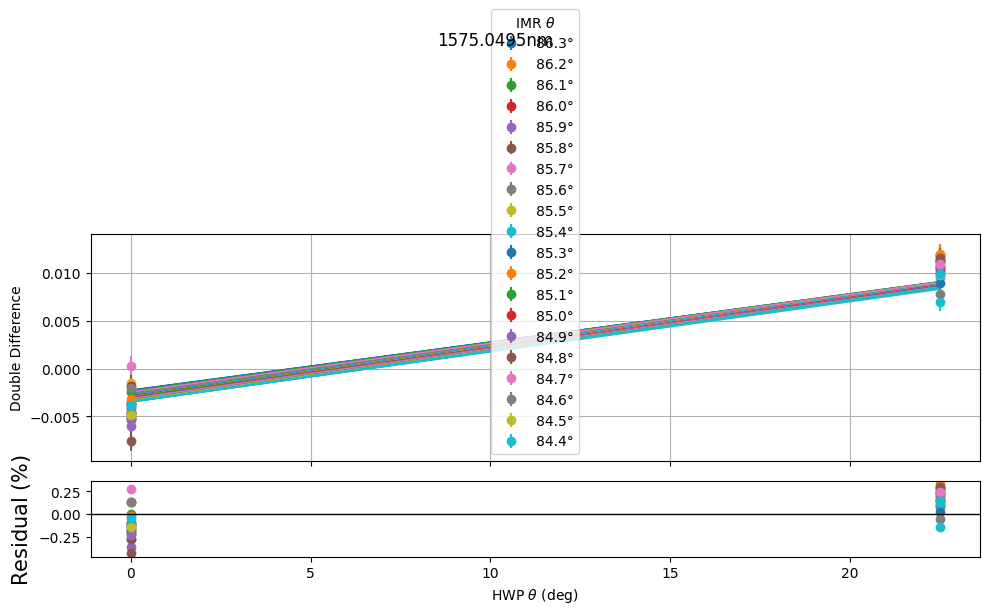

Updated Mueller Matrix:
[[ 0.03986724 -0.03952634  0.00242927  0.00460048]
 [-0.03389526  0.03360542 -0.00206537 -0.00391134]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.4315575381545504 0.32779827756780267
Error: [3.08618230e-05 3.02485066e+00]
s_res: 0.20477781616426932
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8226e+02                                    9.70e+00    
       1              2         7.8253e+01      1.04e+02       1.00e+00       2.67e+03    
       2              3         4.6658e+01      3.16e+01       5.64e+00       6.85e+04    
       3              4         4.5351e+01      1.31e+00       4.32e-01       4.23e+02    
       4              5         4.4624e+01      7.27e-01       8.19e-01       8.16e+01    
       5              6         4.4537e+01      8.66e-02       1.70e-01       2.78e+01    
   

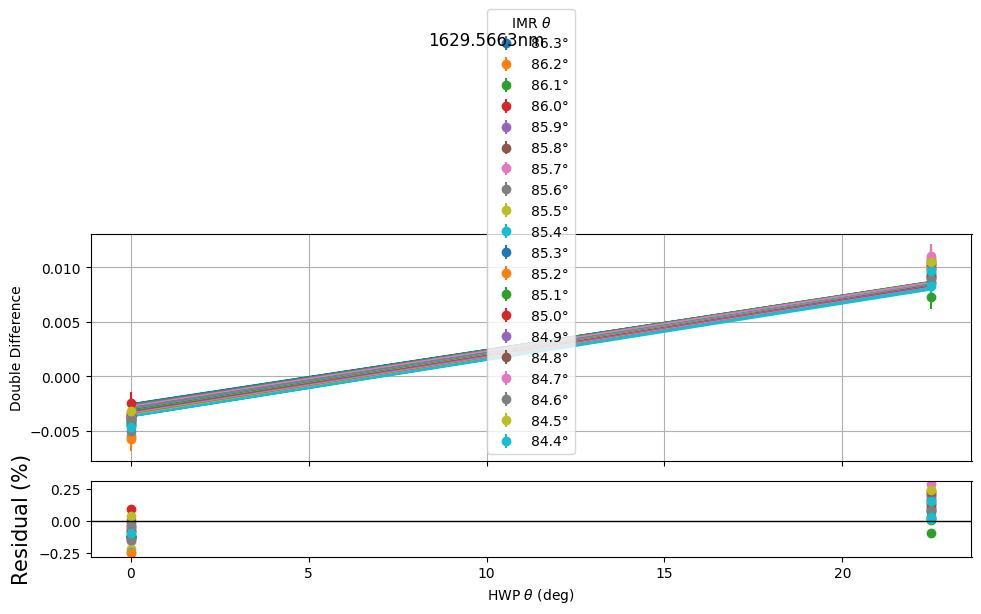

Updated Mueller Matrix:
[[ 0.04114869 -0.04087129  0.00082847  0.00469744]
 [-0.03382863  0.03360058 -0.00068109 -0.0038618 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.25513825606936247 0.28620181266985933
Error: [2.19571222e-05 2.23707963e+00]
s_res: 0.14746365232729755
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.7776e+02                                    7.24e+00    
       1              2         9.5358e+01      8.24e+01       1.00e+00       2.67e+03    
       2              3         6.3747e+01      3.16e+01       5.99e+00       1.36e+05    
       3              4         6.1787e+01      1.96e+00       5.66e-01       4.67e+02    
       4              5         6.0900e+01      8.87e-01       9.59e-01       1.08e+02    
       5              6         6.0784e+01      1.16e-01       2.43e-01       4.13e+01    
  

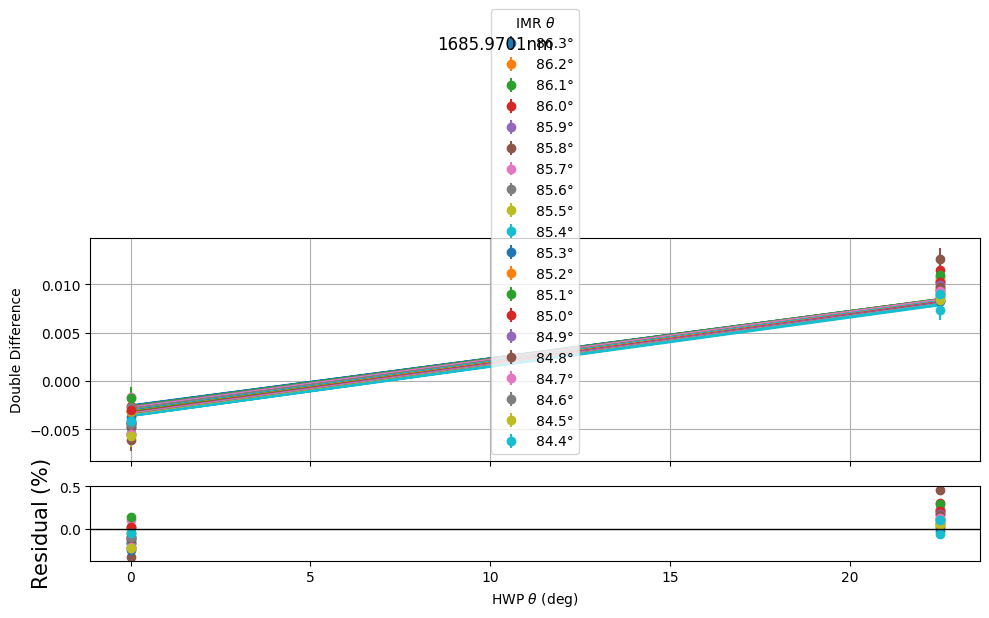

Updated Mueller Matrix:
[[ 0.03612396 -0.03590226  0.00057287  0.00395478]
 [-0.02958392  0.02940236 -0.00046916 -0.00323879]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.33319299739467334 0.4617996147297141
Error: [3.07398768e-05 2.94011874e+00]
s_res: 0.1745146471093737
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8261e+02                                    6.93e+00    
       1              2         1.0797e+02      7.46e+01       1.00e+00       3.23e+03    
       2              3         4.6774e+01      6.12e+01       7.96e+00       3.46e+04    
       3              4         4.5834e+01      9.40e-01       3.95e-01       3.45e+02    
       4              5         4.5239e+01      5.95e-01       7.83e-01       5.00e+01    
       5              6         4.5175e+01      6.42e-02       1.21e-01       1.53e+01    
    

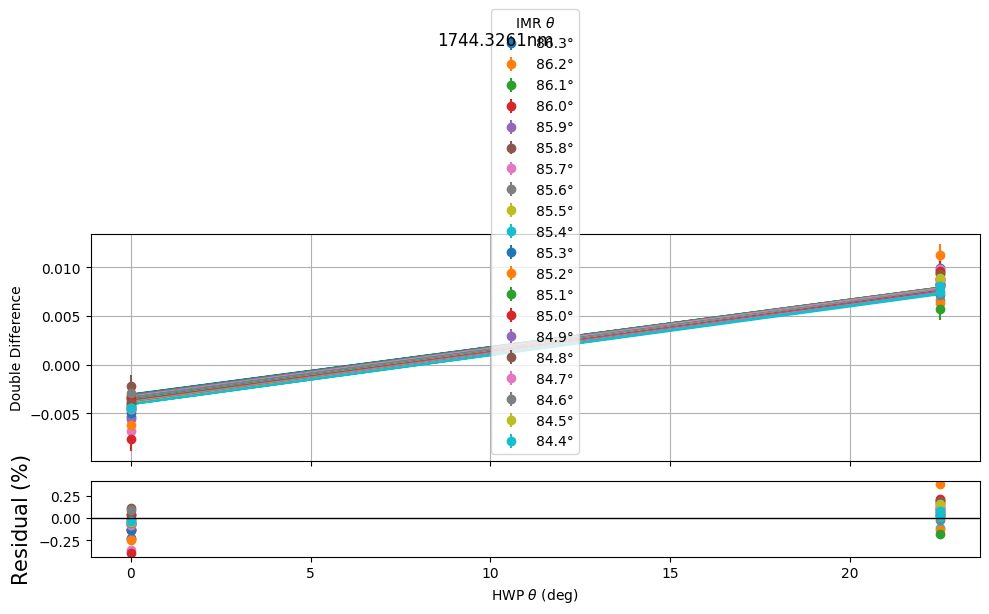

Updated Mueller Matrix:
[[ 0.04341652 -0.04310124 -0.00266901  0.00448931]
 [-0.03846518  0.03818586  0.00236463 -0.00397734]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.3926392843316154 0.3749447943205626
Error: [1.90708006e-05 2.15704860e+00]
s_res: 0.15464165832552426
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.5775e+02                                    5.97e+00    
       1              2         1.9110e+02      6.67e+01       1.00e+00       3.73e+03    
       2              3         1.2825e+02      6.29e+01       9.44e+00       4.99e+05    
       3              4         1.2054e+02      7.70e+00       1.34e+00       6.84e+02    
       4              5         1.1878e+02      1.77e+00       1.62e+00       2.41e+02    
       5              6         1.1842e+02      3.55e-01       6.54e-01       1.29e+02    
    

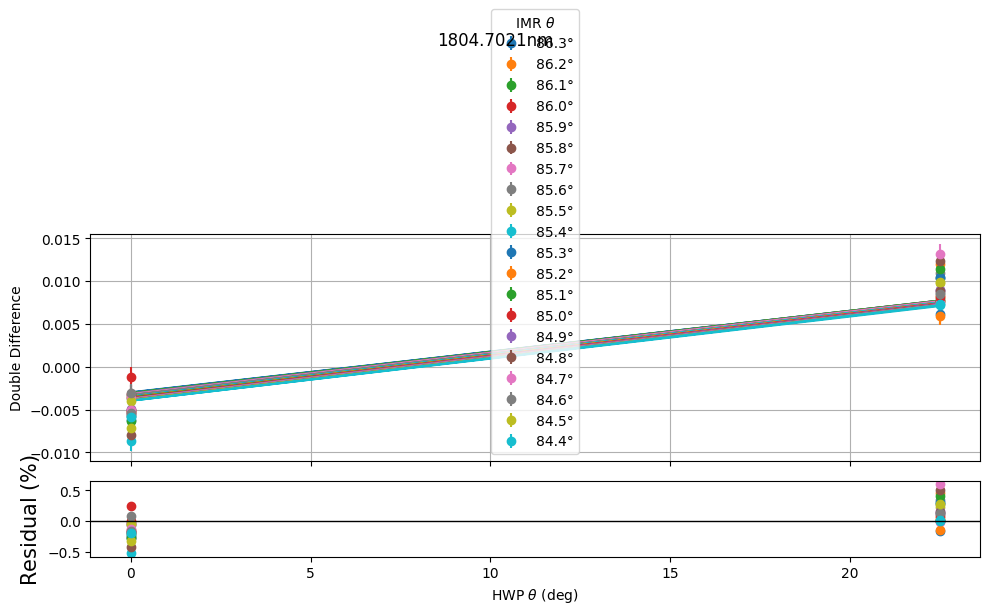

Updated Mueller Matrix:
[[ 0.03975981 -0.03950935 -0.00249306  0.00369296]
 [-0.03376017  0.03354751  0.00211687 -0.0031357 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.5227937399900082 0.5940962405281414
Error: [3.49576088e-05 3.74874653e+00]
s_res: 0.24605413344708743
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2016e+02                                    4.93e+00    
       1              2         1.7577e+02      4.44e+01       1.00e+00       3.01e+03    
       2              3         1.1296e+02      6.28e+01       8.53e+00       5.60e+04    
       3              4         1.1221e+02      7.53e-01       3.89e-01       2.77e+02    
       4              5         1.1177e+02      4.40e-01       7.10e-01       3.41e+01    
       5              6         1.1172e+02      4.80e-02       9.23e-02       1.06e+01    
    

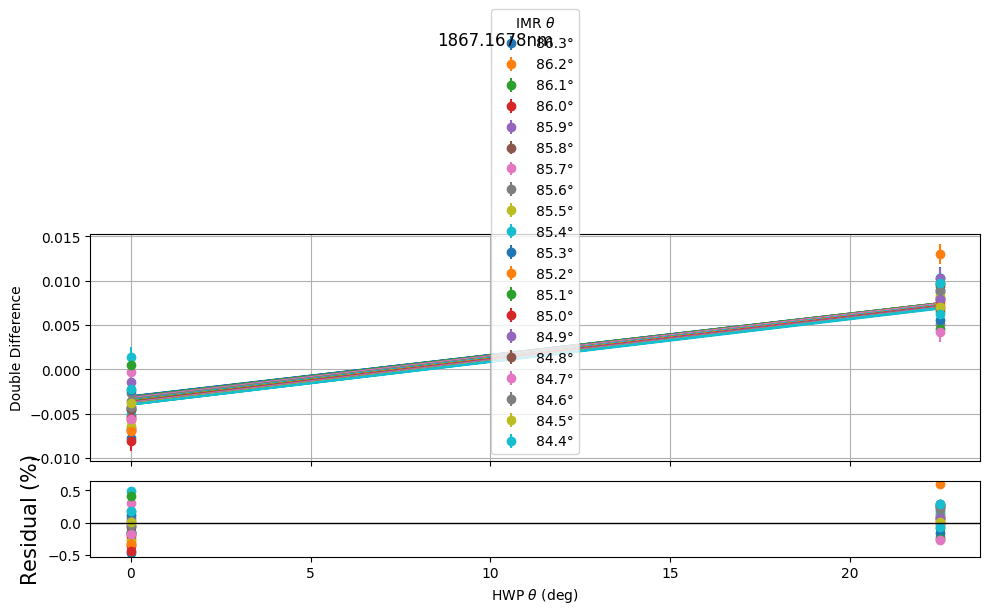

Updated Mueller Matrix:
[[ 0.03968571 -0.03942312 -0.00329925  0.00314445]
 [-0.03374952  0.03352621  0.00280575 -0.0026741 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.4738490507575493 0.5896883759367874
Error: [3.39507371e-05 3.69248406e+00]
s_res: 0.24449358278863564
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3025e+02                                    3.81e+00    
       1              2         9.3376e+01      3.69e+01       1.00e+00       2.81e+03    
       2              3         4.2853e+01      5.05e+01       8.42e+00       1.92e+05    
       3              4         4.0595e+01      2.26e+00       7.45e-01       3.97e+02    
       4              5         3.9740e+01      8.56e-01       1.08e+00       8.27e+01    
       5              6         3.9633e+01      1.07e-01       2.54e-01       3.21e+01    
    

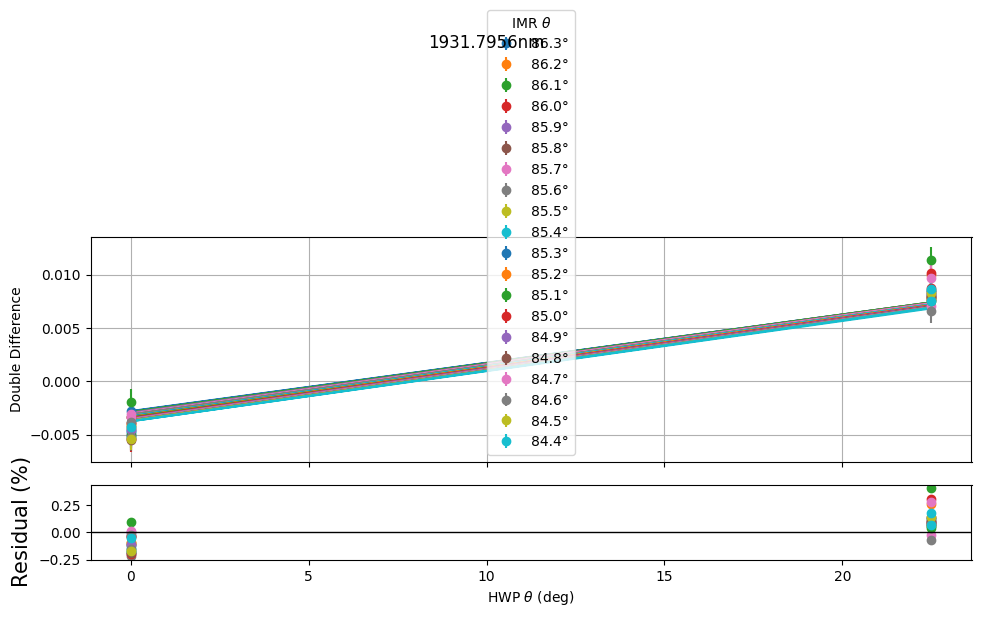

Updated Mueller Matrix:
[[ 0.03447056 -0.03434502 -0.00200941  0.00214509]
 [-0.02750501  0.02740484  0.00160336 -0.00171163]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.22028920557919413 0.4048139923245673
Error: [2.54761684e-05 2.50144709e+00]
s_res: 0.14636302684585134
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2022e+02                                    3.55e+00    
       1              2         8.9420e+01      3.08e+01       1.00e+00       2.77e+03    
       2              3         3.4763e+01      5.47e+01       8.87e+00       1.54e+05    
       3              4         3.2930e+01      1.83e+00       6.88e-01       3.54e+02    
       4              5         3.2186e+01      7.44e-01       1.03e+00       6.84e+01    
       5              6         3.2097e+01      8.93e-02       2.24e-01       2.54e+01    
   

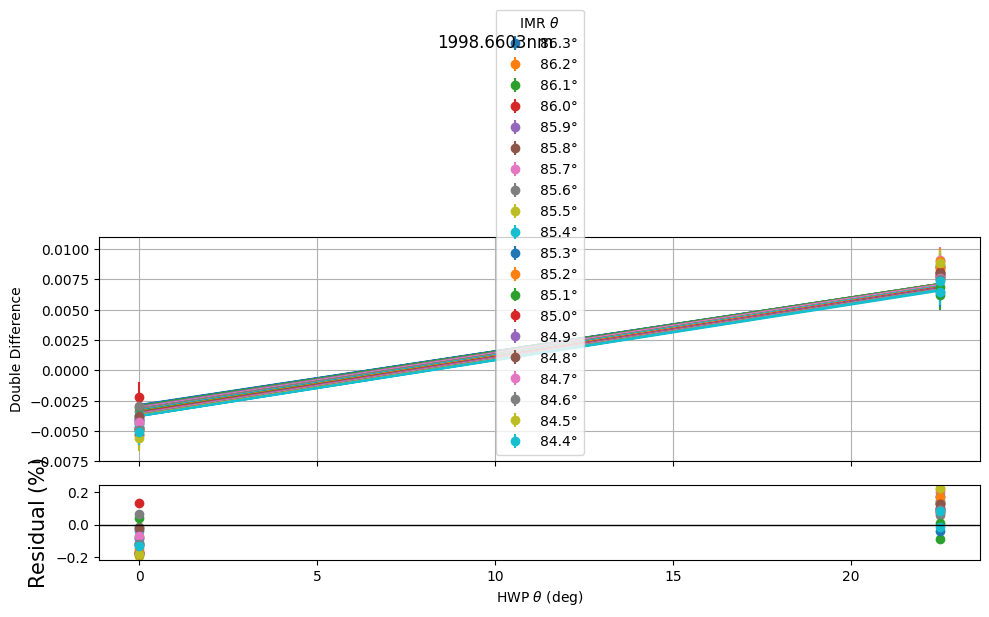

Updated Mueller Matrix:
[[ 0.03466129 -0.03453039 -0.00264601  0.00143383]
 [-0.02979169  0.02967918  0.00227427 -0.00123239]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.1954924206054951 0.2231740757096191
Error: [2.18084069e-05 2.19965582e+00]
s_res: 0.12968556369488812
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1253e+02                                    2.98e+00    
       1              2         8.7438e+01      2.51e+01       1.00e+00       2.55e+03    
       2              3         3.9061e+01      4.84e+01       8.79e+00       1.67e+05    
       3              4         3.6988e+01      2.07e+00       7.67e-01       3.53e+02    
       4              5         3.6211e+01      7.77e-01       1.11e+00       7.57e+01    
       5              6         3.6113e+01      9.77e-02       2.70e-01       2.96e+01    
    

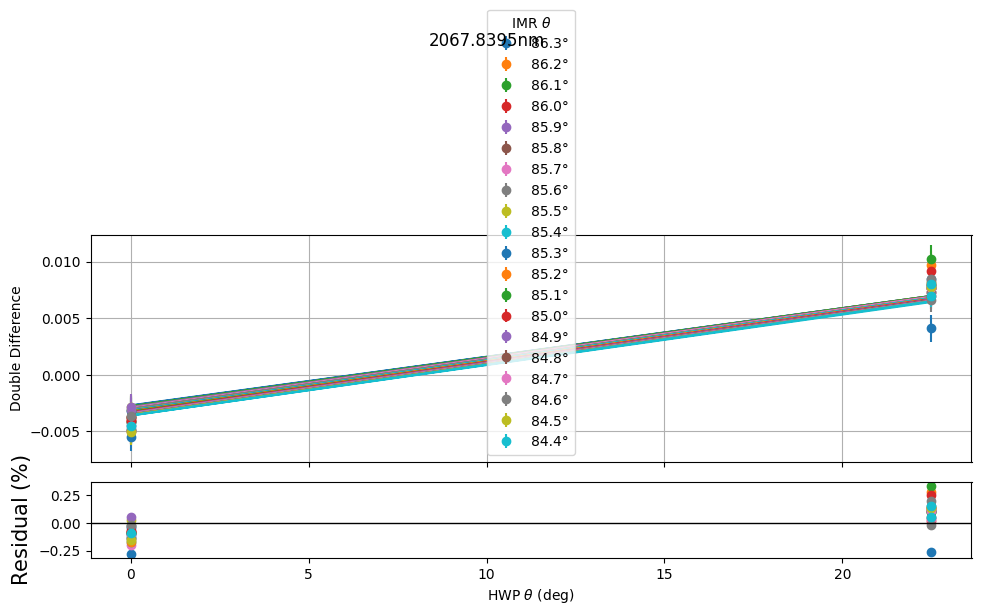

Updated Mueller Matrix:
[[ 0.03465877 -0.03457126 -0.00238979  0.00058908]
 [-0.0251342   0.02507074  0.00173305 -0.0004272 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.28354707228234977 0.33492637634781186
Error: [2.56952821e-05 2.47166341e+00]
s_res: 0.14140837066962283
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1904e+02                                    3.09e+00    
       1              2         9.4602e+01      2.44e+01       1.00e+00       2.63e+03    
       2              3         3.9747e+01      5.49e+01       9.64e+00       1.55e+05    
       3              4         3.7407e+01      2.34e+00       8.41e-01       3.66e+02    
       4              5         3.6540e+01      8.67e-01       1.25e+00       8.82e+01    
       5              6         3.6422e+01      1.18e-01       3.43e-01       3.61e+01    
  

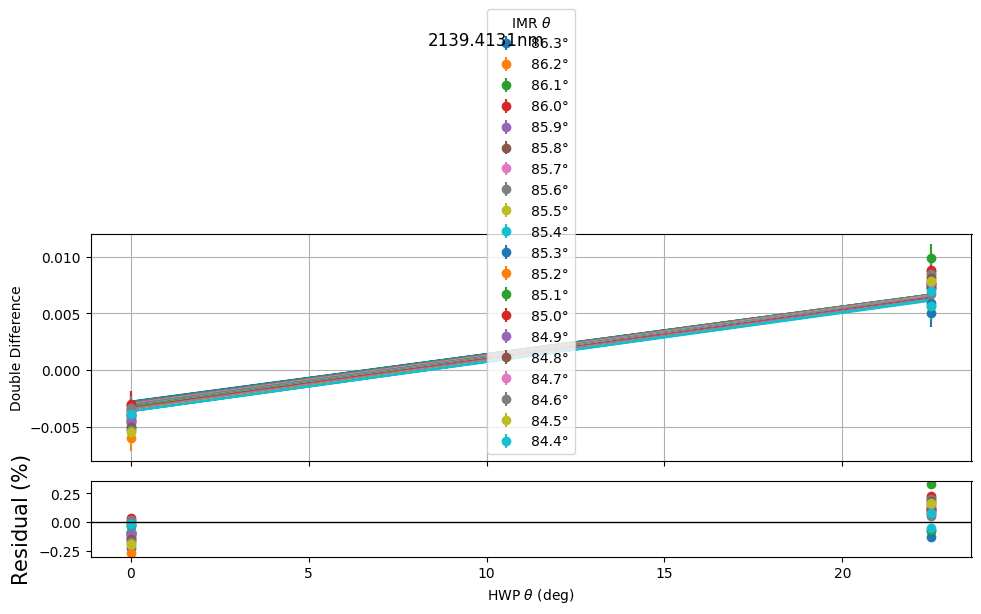

Updated Mueller Matrix:
[[ 0.03804988 -0.03788605 -0.00349424 -0.00048036]
 [-0.02858067  0.02845761  0.00262465  0.00036081]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.272870204780562 0.3291556128874319
Error: [2.28017139e-05 2.33752113e+00]
s_res: 0.14305095736259946
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0244e+02                                    2.66e+00    
       1              2         8.1333e+01      2.11e+01       1.00e+00       2.32e+03    
       2              3         3.4584e+01      4.67e+01       9.11e+00       1.05e+05    
       3              4         3.2925e+01      1.66e+00       7.14e-01       3.13e+02    
       4              5         3.2224e+01      7.01e-01       1.14e+00       6.86e+01    
       5              6         3.2137e+01      8.76e-02       2.81e-01       2.61e+01    
     

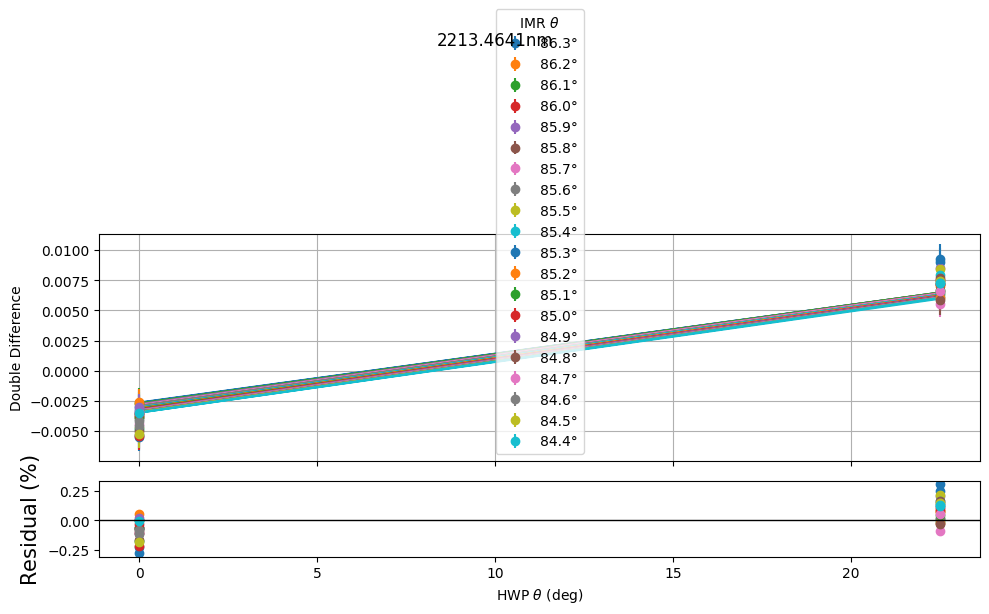

Updated Mueller Matrix:
[[ 0.03857682 -0.03841792 -0.0030328  -0.00174269]
 [-0.02358047  0.02348333  0.00185383  0.00106524]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.27839294461044867 0.3047675037345554
Error: [2.33681078e-05 2.28668703e+00]
s_res: 0.13307184388683932
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1663e+02                                    2.67e+00    
       1              2         9.5675e+01      2.10e+01       1.00e+00       2.23e+03    
       2              3         5.5261e+01      4.04e+01       9.55e+00       2.33e+05    
       3              4         5.1441e+01      3.82e+00       1.22e+00       3.82e+02    
       4              5         5.0464e+01      9.77e-01       1.53e+00       1.25e+02    
       5              6         5.0286e+01      1.78e-01       5.73e-01       6.22e+01    
   

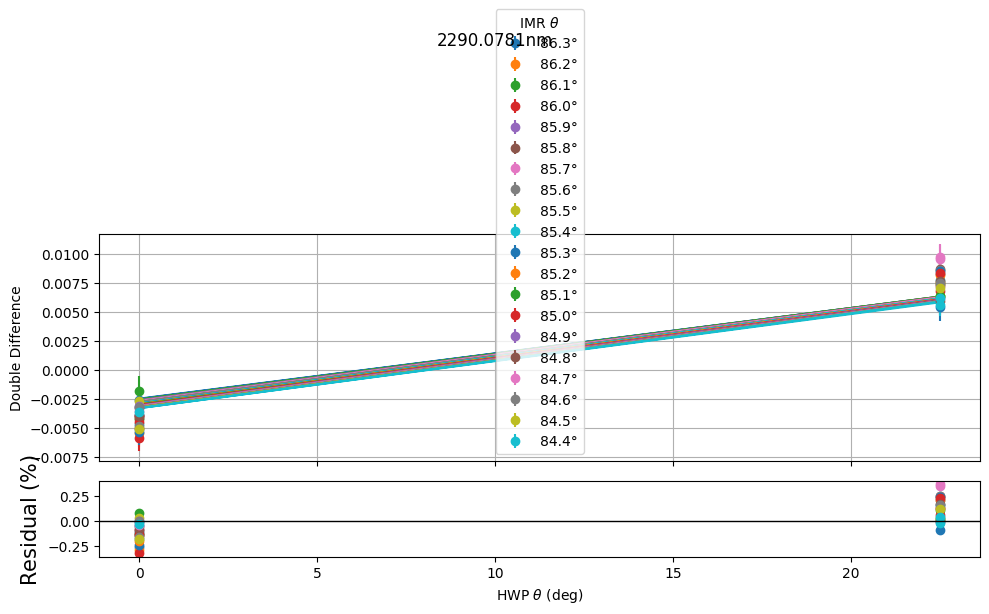

Updated Mueller Matrix:
[[ 0.03950082 -0.03928027 -0.00262304 -0.00323968]
 [-0.02095157  0.02083458  0.00139128  0.00171835]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.32341644097044003 0.36196604602780713
Error: [3.13262975e-05 2.96758563e+00]
s_res: 0.16684666437554097
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.7039e+02                                    1.77e+00    
       1              2         1.5474e+02      1.56e+01       1.00e+00       2.33e+03    
       2              3         1.1137e+02      4.34e+01       1.06e+01       3.14e+05    
       3              4         1.0547e+02      5.90e+00       1.60e+00       4.24e+02    
       4              5         1.0433e+02      1.14e+00       1.83e+00       1.67e+02    
       5              6         1.0407e+02      2.64e-01       8.25e-01       9.57e+01    
  

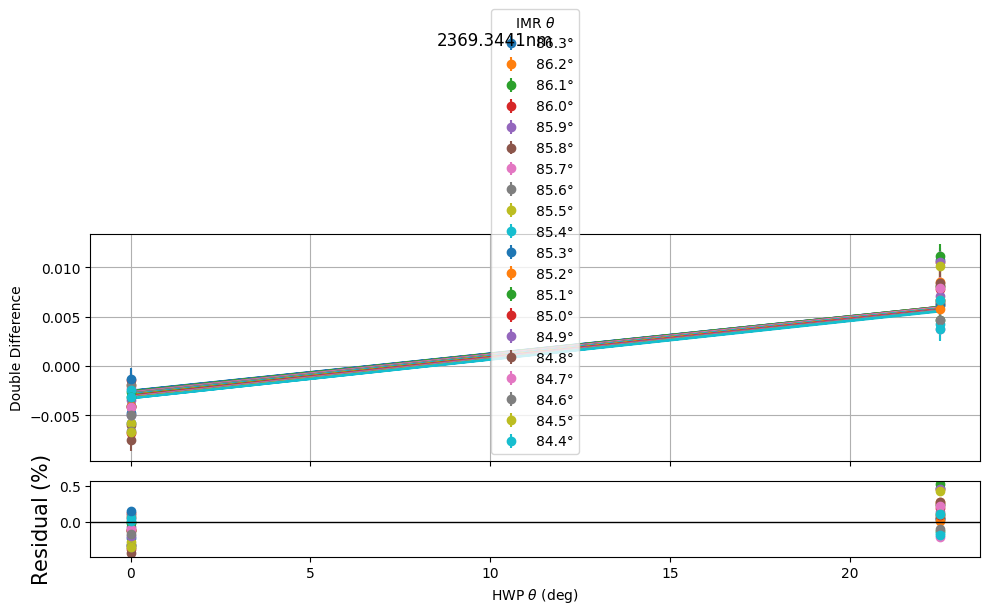

Updated Mueller Matrix:
[[ 0.04443438 -0.04394021 -0.00351718 -0.00559476]
 [-0.01177254  0.01164162  0.00093185  0.00148229]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
200 100
Residuals range: -0.43856021873841783 0.5178743380939065
Error: [4.58666606e-05 4.35921576e+00]
s_res: 0.2423079369373108


In [2]:
# all bins
sres_list = []
error_list = []
for bin in range(22):
    fp = f'datacsvs/onsky_csvs/unpol_standards_1_star/bin{bin}.csv'
    error,fig, ax,sres = fit_CHARIS_Mueller_matrix_by_bin_m3(Path(fp), bin, 
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/m3_diat_w_middle_optics/bin{bin}.json'),
        )
    sres_list.append(sres)
    error_list.append(error)

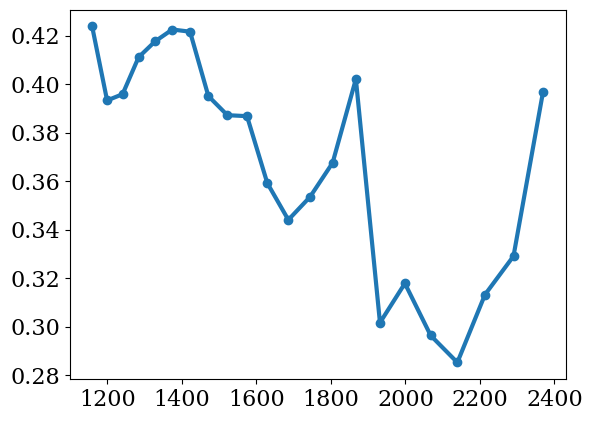

In [ ]:
# 2 stars
plt.plot(wavelength_bins,sres_list,'o-')

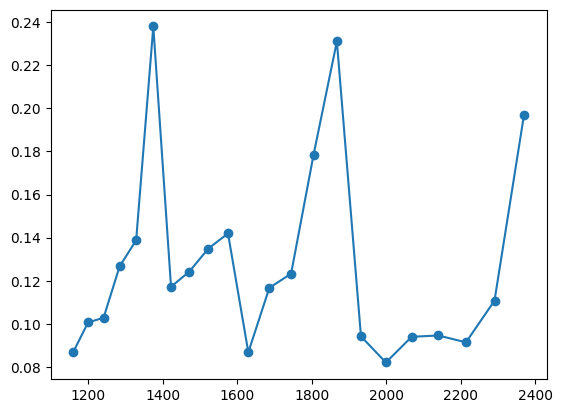

In [ ]:
# 1 star w delta theta
plt.plot(wavelength_bins,sres_list,'o-')

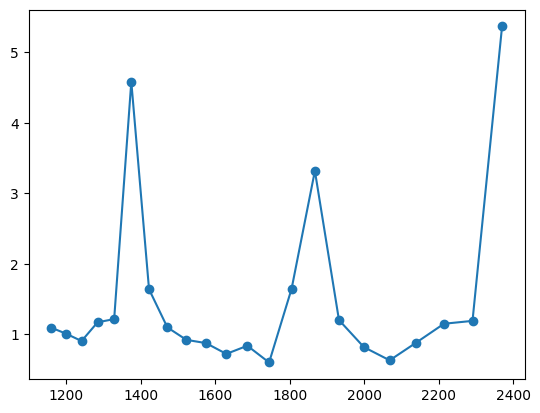

In [30]:
# noisy star delta theta
plt.plot(wavelength_bins,sres_list,'o-')

Text(0.5, 1.0, 's_abs for HD25532')

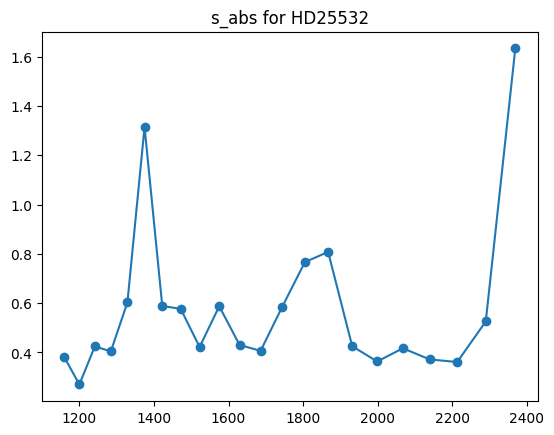

In [4]:
# noisy star delta theta better bins
plt.plot(wavelength_bins,sres_list,'o-')
plt.title('s_abs for HD25532')

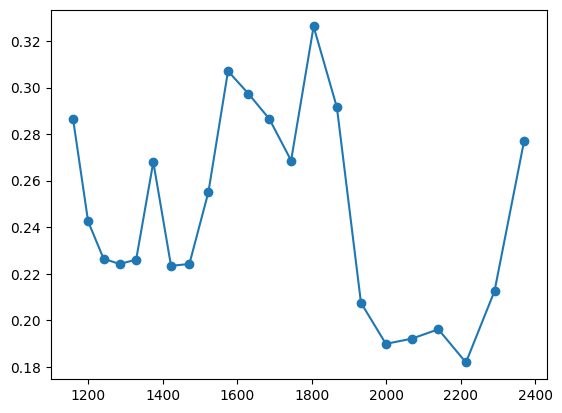

In [3]:
# m3 and optics term 
plt.plot(wavelength_bins,sres_list,'o-')

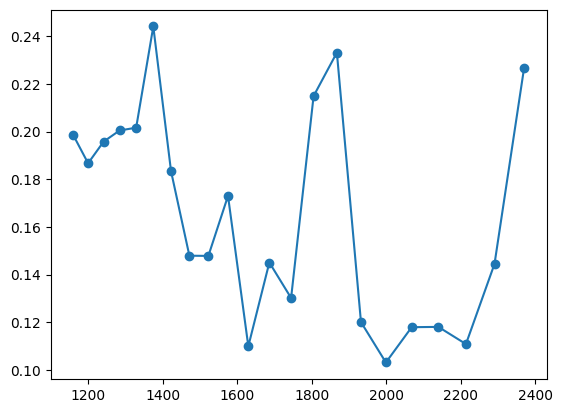

In [3]:
# m3 with 2 optics terms
plt.plot(wavelength_bins,sres_list,'o-')

Text(0.5, 1.0, 's_abs for Unpolarized Standard HD 35532 with Linear Diattenuator Term')

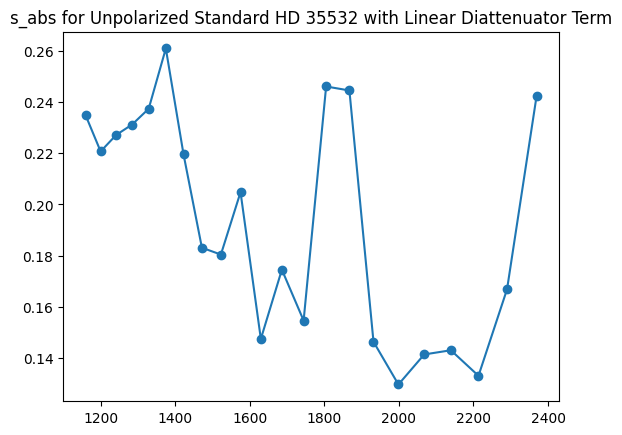

In [6]:
# m3 w middle optics term
plt.plot(wavelength_bins,sres_list,'o-')
plt.title('s_abs for Unpolarized Standard HD 35532 with Linear Diattenuator Term')

In [5]:
from vampires_calibration.csv_tools import model_data
jsondir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/m3_diat_w_middle_optics'
df = model_data(Path(jsondir))
df

,wavelength_bin,optics2_delta_theta,optics2_epsilon
0,1159.5614,-0.011524,1.0
1,1199.6971,0.018117,1.0
2,1241.2219,-1.048642,1.0
3,1284.1840,-1.060977,1.0
4,1328.6331,-0.972469,1.0
5,1374.6208,-0.254795,1.0
6,1422.2002,-1.081306,1.0
7,1471.4264,1.539855,1.0
8,1522.3565,2.834577,1.0
9,1575.0495,3.322544,1.0


In [15]:
errors=np.array(error_list)
errors1 = np.mean(errors[:,0])
errors2 = np.mean(errors[:,1])
print(errors1,errors2)

0.00017862185505378422 0.4783276155760076


In [17]:
# refine model
def phys_model_chisq(p0, wavelengths, diat_m3,errors_m3):
    """
    Calculate the chi squared for the physical model of CHARIS.
    
    Parameters:
    -----------
    p0 : list
        List of parameters [m1,b1,m2,b2].
    
    wavelengths : numpy array
        Array of wavelengths that are in the data.

    diat_m3 : float
        Diattenuation of the M3 mirror at the given wavelengths.
    
    errors_m3 : numpy array
        Array of errors for the M3 diattenuation.

    Returns:
    --------
    float
        The chi squared value.
    """
    # Get model diat
    model_diat = M3_diattenuation(wavelengths, p0[0],p0[1],p0[2],p0[3])

    # Calculate residual

    residuals_m3 = (model_diat - diat_m3) / errors_m3

    # Calculate chisq
    chisq_m3 = np.sum(residuals_m3**2)
    return chisq_m3


In [21]:
from scipy.optimize import minimize
from vampires_calibration.fitting import update_p0
# define bounds
p0 = [2.104,14.2,2.1,13.2]
m1_b = (0.8*p0[0],1.2*p0[0])
b1_b = (0.8*p0[1],1.2*p0[1])
m2_b = (0.8*p0[2],1.2*p0[2])    
b2_b = (0.8*p0[3],1.2*p0[3])
m3_diat = df['M3_epsilon'].values
bounds = [m1_b, b1_b, m2_b, b2_b]

# iterative fitting
iteration = 1
previous_chisq = 1000000
new_chisq = 0

while abs(previous_chisq-new_chisq)> 0.01*abs(previous_chisq):
        previous_chisq = new_chisq
        result = minimize(phys_model_chisq,p0, args=(wavelength_bins,m3_diat,errors1), bounds=bounds)
        p0 = result.x
        new_chisq = result.fun
        iteration += 1
        print(result)

# get error from covariance matrix
covariance_matrix = result.hess_inv.todense()
errors_phys = np.sqrt(np.diag(covariance_matrix))
print("Final Parameters:")
print(p0)
print("Final Errors:")
print(errors_phys)





  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 137.2782767605274
        x: [ 1.807e+00  1.373e+01  1.793e+00  1.374e+01]
      nit: 149
      jac: [ 1.968e-01 -1.533e-01 -8.870e-02 -1.309e-01]
     nfev: 1010
     njev: 202
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 137.27827675641066
        x: [ 1.807e+00  1.373e+01  1.793e+00  1.374e+01]
      nit: 1
      jac: [-2.618e-01 -6.982e-02  5.718e-02 -1.528e-01]
     nfev: 15
     njev: 3
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
Final Parameters:
[ 1.80661155 13.73356836  1.79301933 13.73786266]
Final Errors:
[1. 1. 1. 1.]
